# Segmentation of Indian Traffic

In [ ]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

<pre>

1. All data will be in the folder "data" 

2. Inside the data there are following two folders

|--- data
|-----| ---- images
|-----| ------|----- Scene 1
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
|-----| ---- masks
|-----| ------|----- Scene 1
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
</pre>

# Task 1: Preprocessing

## 1. Get all the file name and corresponding json files

In [ ]:
!wget --header="Host: doc-00-98-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1bynkOIXCurhJ9_Y5Q14KWX5yDyCRkKfN" --header="Cookie: AUTH_ufqf679c9s84m8v94dndb0c1l42d162e_nonce=vjrce1rao7nu2" --header="Connection: keep-alive" "https://doc-00-98-docs.googleusercontent.com/docs/securesc/cjm3fambk0lkqkbuqmm5ghfps1li7j9b/7h7g9l8pvjretub00gr0l25h8mgk6jt4/1595417175000/00484516897554883881/14265967465260034040/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&authuser=0&nonce=vjrce1rao7nu2&user=14265967465260034040&hash=ej1icbo0tjckop85gqug5sct5sc9v40a" -c -O 'data.zip'

--2020-07-22 11:27:02--  https://doc-00-98-docs.googleusercontent.com/docs/securesc/cjm3fambk0lkqkbuqmm5ghfps1li7j9b/7h7g9l8pvjretub00gr0l25h8mgk6jt4/1595417175000/00484516897554883881/14265967465260034040/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&authuser=0&nonce=vjrce1rao7nu2&user=14265967465260034040&hash=ej1icbo0tjckop85gqug5sct5sc9v40a
Resolving doc-00-98-docs.googleusercontent.com (doc-00-98-docs.googleusercontent.com)... 74.125.128.132, 2a00:1450:4013:c02::84
Connecting to doc-00-98-docs.googleusercontent.com (doc-00-98-docs.googleusercontent.com)|74.125.128.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip                [      <=>           ]   2.18G  60.7MB/s    in 39s     

2020-07-22 11:27:42 (57.4 MB/s) - ‘data.zip’ saved [2339740971]



In [ ]:
!unzip /content/data.zip

In [ ]:
import os
import pandas as pd
def return_file_names_df(root_dir):
    # write the code that will create a dataframe with two columns ['images', 'json']
    # the column 'image' will have path to images
    # the column 'json' will have path to json files
    images_complete_list=[]
    json_complete_list=[]

    images_list=os.listdir('/content/data/images')
    images_list.sort()
    json_list=os.listdir('/content/data/mask')
    json_list.sort()
    for i in range(len(images_list)):
      a=os.listdir("/content/data/images/"+str(images_list[i]))
      b=os.listdir('/content/data/mask/'+str(json_list[i]))
      if str(images_list[i]) =='403' or str(images_list[i])=='426' or str(images_list[i]) =='422' or str(images_list[i])=='421'or str(images_list[i])=='417' or str(images_list[i])=='416' :
        a.sort(key= lambda x : int(x[:-16]))
      else:
        a.sort(key= lambda x : int(x[5:-16]))
      if str(json_list[i]) =='403' or str(json_list[i])=='426' or str(json_list[i]) =='422' or str(json_list[i])=='421'or str(json_list[i])=='417' or str(json_list[i])=='416' :
        b.sort(key= lambda x : int(x[:-21]))
      else:
        b.sort(key= lambda x : int(x[5:-21]))
      for a1 in a:
         images_complete_list.append('data/images/'+str(images_list[i])+'/'+a1)
      for b1 in b:
          json_complete_list.append('data/mask/'+str(json_list[i])+'/'+b1)

    data_df=pd.DataFrame()
    data_df['images']=images_complete_list
    data_df['json'] = json_complete_list
    return data_df

In [ ]:
data_df = return_file_names_df('root_dir')
data_df.head()

,images,json
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json


> If you observe the dataframe, we can consider each row as single data point, where first feature is image and the second feature is corresponding json file

In [ ]:

def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][12:i[0].find('_')]==i[1][10:i[1].find('_')]):
          
            return False
    return True

In [ ]:
grader_1(data_df)

True

In [ ]:
data_df.shape

(4008, 2)

## 2. Structure of sample Json file

<img src='https://i.imgur.com/EfR5KmI.png' width="200" height="100">

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

Let's see how many unique objects are there in the json file.


In [ ]:
import json

def return_unique_labels(data_df):
  unique_labels=[]
  for i in data_df['json']:
    f = open(i,)
    data=json.load(f)
    a=data['objects']
    for k in range(len(a)):
      unique_labels.append(a[k]['label'])
  unique_labels=set(unique_labels)
  unique_labels=list(unique_labels)
  print(len(unique_labels))
 
    # for each file in the column json
    #       read and store all the objects present in that file
    # compute the unique objects and retrun them
    # if open any json file using any editor you will get better sense of it
  return unique_labels

In [ ]:
unique_labels = return_unique_labels(data_df)

40


In [ ]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [ ]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40:
        print("True")
    else:
        print("Flase")

grader_2(unique_labels)

True


In [ ]:
new_label_clr = {'road':10, 'parking/drivable fallback':20,'sidewalk':30,'non-drivable fallback/rail track':40,\
                        'person/animal':50, 'rider':60, 'motorcycle/bicycle':70, 'autorickshaw/car':80,\
                        'truck/bus/vehicle fallback/trailer/caravan':90,\
                        'curb/wall':100, 'fence/guard rail':110, 'billboard/traffic sign/traffic light':120,\
                        'pole/polegroup/obs-str-bar-fallback':130,'building/bridge/tunnel':140,\
                        'vegetation':150, 'sky/fallback background':160,'unlabeled/out of roi':0,\
                        'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [ ]:
len(new_label_clr)

21

In [ ]:
f = open('/content/data/mask/201/frame1469_gtFine_polygons.json',)
label=[]
vertexlist=[]
data=json.load(f)
w=data['imgWidth']
h=data['imgHeight']
for i in range(len(data['objects'])):
    label.append(data['objects'][i]['label'])
    local_list=[]
    for k in data['objects'][i]['polygon']:
      local_list.append(tuple(k))
    vertexlist.append(local_list)
print(label)
print(vertexlist)

['sky', 'road', 'drivable fallback', 'drivable fallback', 'non-drivable fallback', 'non-drivable fallback', 'building', 'building', 'fallback background', 'obs-str-bar-fallback', 'motorcycle', 'building', 'building', 'motorcycle', 'wall', 'obs-str-bar-fallback', 'vegetation', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'person', 'car', 'obs-str-bar-fallback', 'vegetation', 'vegetation', 'vegetation', 'vegetation', 'vegetation', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'obs-str-bar-fallback', 'vehicle fallback', 'pole', 'building', 'wall', 'building', 'wall', 'wall', 'vegetation', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'vegetation', 'wall', 'pole', 'pole', 'vegetation', 'pole', 'pole', 'obs-str-bar-fallback', 'obs-str-bar-fallback', 'wall', 'motorcycle', 'rider', 'curb', 'pole', 'obs-str-bar-fallback', 'pole', 'obs-str-bar-fallback', 'obs-str-bar-fallback', 'pole', 'obs-str-bar-fallback', 'pole',

<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [ ]:
def get_poly(file):
    label=[]
    vertexlist=[]
    # this function will take a file name as argument
    f = open(file,)
    data=json.load(f)
    w=data['imgWidth']
    h=data['imgHeight']
    for i in range(len(data['objects'])):
        label.append(data['objects'][i]['label'])
        local_list=[]
        for k in data['objects'][i]['polygon']:
            local_list.append(tuple(k))
        vertexlist.append(local_list)
        

    # it will process all the objects in that file and returns
    
    # label: a list of labels for all the objects label[i] will have the corresponding vertices in vertexlist[i]
    # len(label) == number of objects in the image
    
    # vertexlist: it should be list of list of vertices in tuple formate 
    # ex: [[(x11,y11), (x12,y12), (x13,y13) .. (x1n,y1n)]
    #     [(x21,y21), (x22,y12), (x23,y23) .. (x2n,y2n)]
    #      .....
    #     [(xm1,ym1), (xm2,ym2), (xm3,ym3) .. (xmn,ymn)]]
    # len(vertexlist) == number of objects in the image
    
    # * note that label[i] and vertextlist[i] are corresponds to the same object, one represents the type of the object
    # the other represents the location
    
    # width of the image
    # height of the image
    return w, h, label, vertexlist

In [ ]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )

grader_3('data/mask/201/frame0029_gtFine_polygons.json')

True


## 4. Creating Image segmentations by drawing set of polygons

### Example

(28, 28, 3)
[[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 

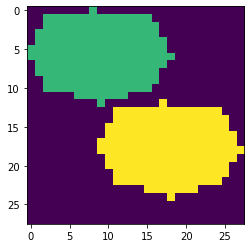

In [ ]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
side=8
x1 = [ ((math.cos(th) + 1) *9, (math.sin(th) + 1) * 6) for th in [i * (2 * math.pi) / side for i in range(side)] ]
x2 = [ ((math.cos(th) + 2) *9, (math.sin(th) + 3) *6) for th in [i * (2 * math.pi) / side for i in range(side)] ]

img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
# please play with the fill value
# writing the first polygon
img1.polygon(x1, fill =20)
# writing the second polygon
img1.polygon(x2, fill =30)

img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])
im.save("test_image.png")

In [ ]:
def compute_masks(data_df):
    mask=[]
    for i in range(len(data_df['json'])):
        w,h,label,vertexlist = get_poly(data_df['json'].iloc[i])
        a=data_df['json'].iloc[i]
        
    # after you have computed the vertexlist plot that polygone in image like this
        img = Image.new("RGB", (w, h))
        img1 = ImageDraw.Draw(img)
        for j in range(len(label)):
            if(len(vertexlist[j])<=1):
                pass
            else: 
                img1.polygon(vertexlist[j], fill = label_clr[label[j]])
        img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here

        im = Image.fromarray(img[:,:,0])
        if(os.path.isdir('data/output/'+ str(a[10:13]))):
            im.save('data/output/'+str(a[10:13])+'/'+a[14:-21]+'_gtFine_polygons.png')
        else:
            os.makedirs('data/output/'+str(a[10:13]))
            im.save('data/output/'+str(a[10:13])+'/'+a[14:-21]+'_gtFine_polygons.png')
    # after drawing all the polygons that we collected from json file, 
    # you need to store that image in the folder like this "data/output/scene/framenumber_gtFine_polygons.png"
        mask.append('data/output/'+str(a[10:13])+'/'+a[14:-21]+'_gtFine_polygons.png')
    data_df['mask'] =mask
    # after saving the image into disk, store the path in a list
    # after storing all the paths, add a column to the data_df['mask'] ex: data_df['mask']= mask_paths
    
    return data_df

In [ ]:
data_df = compute_masks(data_df)
data_df.head()

,images,json,mask
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json,data/output/201/frame0029_gtFine_polygons.png
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json,data/output/201/frame0299_gtFine_polygons.png
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json,data/output/201/frame0779_gtFine_polygons.png
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json,data/output/201/frame1019_gtFine_polygons.png
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json,data/output/201/frame1469_gtFine_polygons.png


In [ ]:
data_df = compute_masks(data_df)
data_df.head()

,images,json,mask
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json,data/output/201/frame0029_gtFine_polygons.png
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json,data/output/201/frame0299_gtFine_polygons.png
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json,data/output/201/frame0779_gtFine_polygons.png
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json,data/output/201/frame1019_gtFine_polygons.png
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json,data/output/201/frame1469_gtFine_polygons.png


True
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]


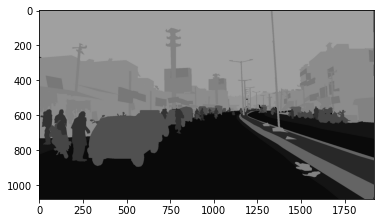

In [ ]:
def grader_3():
    url = "https://i.imgur.com/4XSUlHk.png"
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    my_img = cv2.imread('data/output/201/frame0029_gtFine_polygons.png')    
    plt.imshow(my_img)
    print((my_img[:,:,0]==img).all())
    print(np.unique(img))
    print(np.unique(my_img[:,:,0]))
    data_df.to_csv('preprocessed_data.csv', index=False)
grader_3()

# Task 2: Applying Unet to segment the images

<pre>
* please check the paper: https://arxiv.org/abs/1505.04597

* <img src='https://i.imgur.com/rD4yP7J.jpg' width="500">


* please check the library <a hreaf='https://github.com/qubvel/segmentation_models'>https://github.com/qubvel/segmentation_models</a>

* You can install it like this "pip install -U segmentation-models==0.2.1", even in google colab you can install the    same with "!pip install -U segmentation-models==0.2.1" 


</pre>

In [ ]:
!pip install -U segmentation-models==0.2.1

     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 


### Task 2.1: Dice loss

Dice loss originates from Sørensen–Dice coefficient, which is a statistic developed in 1940s to gauge the similarity between two samples. It was brought to computer vision community by Milletari et al. in 2016 for 3D medical image segmentation.

 the Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images.

from the perspective of set theory, in which the Dice coefficient (DSC) is a measure of overlap between two sets.

For example, if two sets A and B overlap perfectly, DSC gets its maximum value to 1. Otherwise, DSC starts to decrease, getting to its minimum value to 0 if the two sets don ‘t overlap at all. 

Therefore, the range of DSC is between 0 and 1, the larger the better. Thus we can use 1-DSC as Dice loss to maximize the overlap between two sets.


In boundary detection tasks, the ground truth boundary pixels and predicted boundary pixels can be viewed as two sets. By leveraging Dice loss, the two sets are trained to overlap little by little. 

Therefore, Dice loss considers the loss information both locally and globally, which is critical for high accuracy.

### Task 2.2: Training Unet


<pre>
* Split the data into 80:20.
* Train the UNET on the given dataset and plot the train and validation loss.
* As shown in the reference notebook plot 20 images from the test data along with its segmentation map, predicted map.
</pre>

In [ ]:
import tensorflow as tf
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
# import albumentations as A
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, BatchNormalization, ReLU, Reshape
from tensorflow.keras.models import Model
import random as rn

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_df, test_size=0.10, random_state=42)

In [ ]:
# we are importing the pretrained unet from the segmentation models
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models import Unet
# sm.set_framework('tf.keras')
tf.keras.backend.set_image_data_format('channels_last')

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


In [ ]:
# loading the unet model and using the resnet 34 and initilized weights with imagenet weights
# "classes" :different types of classes in the dataset
model = Unet('resnet34', encoder_weights='imagenet', classes=21, activation='softmax', input_shape=(512,512,3))

85524480/85521592 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "u-resnet34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 512, 512, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 518, 518, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 256, 256, 64) 9408        zero_padding2d_1[0][0]           
_________________________________________________________________________________________

In [ ]:
def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if i==1:
            plt.imshow(image, cmap='gray', vmax=1, vmin=0)
        else:
            plt.imshow(image)
    plt.show()

class Dataset:
    # we will be modifying this CLASSES according to your data/problems
    new_label_clr = {'road':10, 'parking/drivable fallback':20,'sidewalk':30,'non-drivable fallback/rail track':40,\
                        'person/animal':50, 'rider':60, 'motorcycle/bicycle':70, 'autorickshaw/car':80,\
                        'truck/bus/vehicle fallback/trailer/caravan':90,\
                        'curb/wall':100, 'fence/guard rail':110, 'billboard/traffic sign/traffic light':120,\
                        'pole/polegroup/obs-str-bar-fallback':130,'building/bridge/tunnel':140,\
                        'vegetation':150, 'sky/fallback background':160,'unlabeled/out of roi':0,\
                        'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}
    # the parameters needs to changed based on your requirements
    # here we are collecting the file_names because in our dataset, both our images and maks will have same file name
    # ex: fil_name.jpg   file_name.mask.jpg
    def __init__(self, images_dir, file_names):
        new_label_clr = {'road':10, 'parking/drivable fallback':20,'sidewalk':30,'non-drivable fallback/rail track':40,\
                        'person/animal':50, 'rider':60, 'motorcycle/bicycle':70, 'autorickshaw/car':80,\
                        'truck/bus/vehicle fallback/trailer/caravan':90,\
                        'curb/wall':100, 'fence/guard rail':110, 'billboard/traffic sign/traffic light':120,\
                        'pole/polegroup/obs-str-bar-fallback':130,'building/bridge/tunnel':140,\
                        'vegetation':150, 'sky/fallback background':160,'unlabeled/out of roi':0,\
                        'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}
        
        # the paths of images
        self.images_fps   = images_dir
        # the paths of segmentation images
        self.masks_fps    = file_names
        # giving labels for each class
        self.class_values = list(new_label_clr.values())
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
        image =cv2.resize(image,(512,512))
        mask  = cv2.imread(self.masks_fps[i], cv2.IMREAD_UNCHANGED)
        image_mask =cv2.resize(mask,(512,512))
      
        
        image_masks = [(image_mask == v) for v in self.class_values]
        image_mask = np.stack(image_masks, axis=-1).astype('float')

            
        return image, image_mask
        
    def __len__(self):
        return len(self.images_fps)
    
    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [ ]:
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet

optim = tf.keras.optimizers.Adam(0.0001)

focal_loss = sm.losses.cce_dice_loss

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss 
# or total_loss = sm.losses.categorical_focal_dice_loss 

model.compile(optim, focal_loss, metrics=[iou_score])

In [ ]:
# Dataset for train images
import keras
BATCH_SIZE=4
train_dataset = Dataset(list(X_train['images']),list(X_train['mask']))
test_dataset  = Dataset(list(X_test['images']),list(X_test['mask']))


train_dataloader = Dataloder(train_dataset, batch_size=4, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=4, shuffle=True)

print(train_dataloader[0][0].shape)
assert train_dataloader[0][0].shape == (BATCH_SIZE, 512, 512, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 512, 512, 21)

# define callbacks for learning rate scheduling and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, \
                                       mode='min', monitor='val_iou_score')
]

(4, 512, 512, 3)


In [ ]:
history = model.fit_generator(train_dataloader, steps_per_epoch=len(train_dataloader), epochs=20,\
                              validation_data=test_dataloader,callbacks=callbacks )

Epoch 1/20
901/901 [==============================] - 509s 565ms/step - loss: 1.7208 - iou_score: 0.1252 - val_loss: 1.4570 - val_iou_score: 0.1686
Epoch 2/20
901/901 [==============================] - 486s 540ms/step - loss: 1.2493 - iou_score: 0.1975 - val_loss: 1.0882 - val_iou_score: 0.2183
Epoch 3/20
901/901 [==============================] - 486s 539ms/step - loss: 1.0094 - iou_score: 0.3207 - val_loss: 0.8616 - val_iou_score: 0.4362
Epoch 4/20
901/901 [==============================] - 484s 537ms/step - loss: 0.7884 - iou_score: 0.4802 - val_loss: 0.7697 - val_iou_score: 0.4809
Epoch 5/20
901/901 [==============================] - 483s 536ms/step - loss: 0.7189 - iou_score: 0.5063 - val_loss: 0.7403 - val_iou_score: 0.4904
Epoch 6/20
901/901 [==============================] - 482s 535ms/step - loss: 0.6810 - iou_score: 0.5211 - val_loss: 0.7254 - val_iou_score: 0.4979
Epoch 7/20
901/901 [==============================] - 482s 535ms/step - loss: 0.6450 - iou_score: 0.5349 - val_l

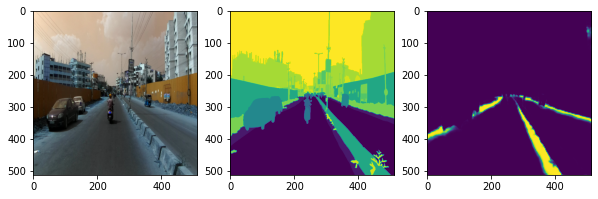

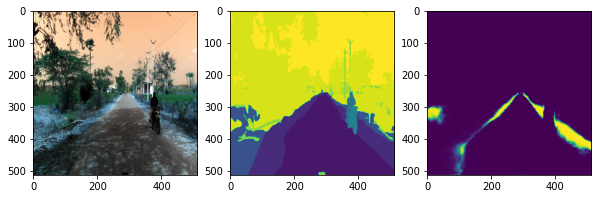

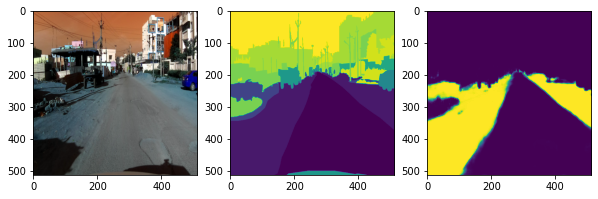

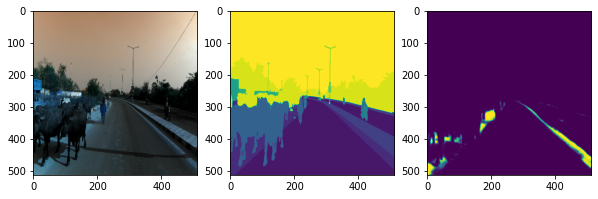

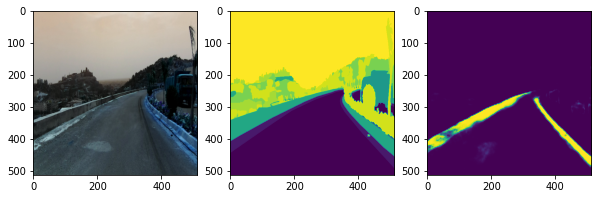

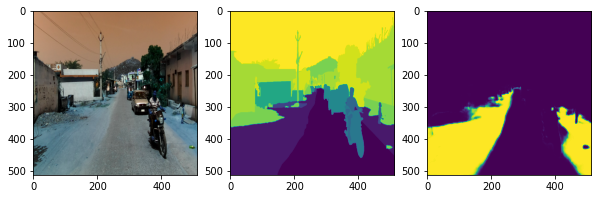

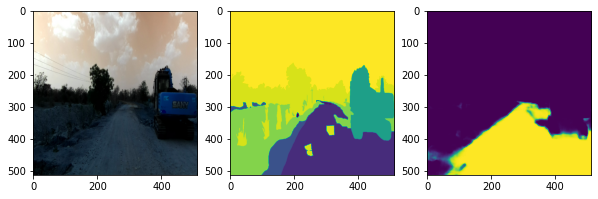

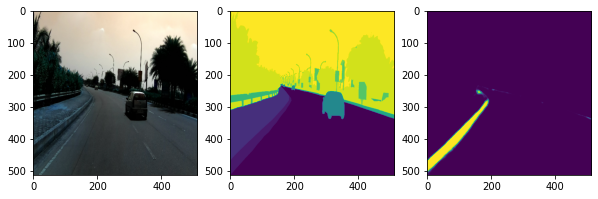

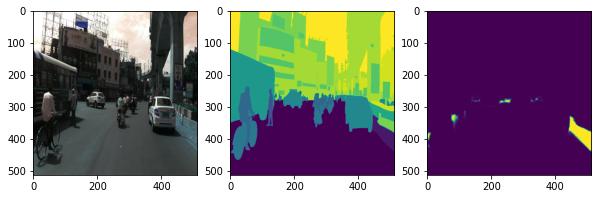

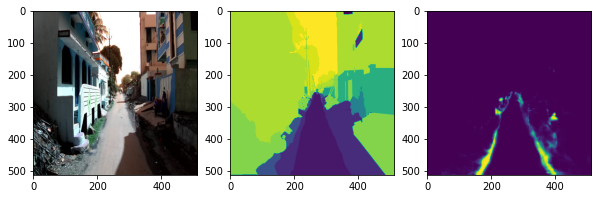

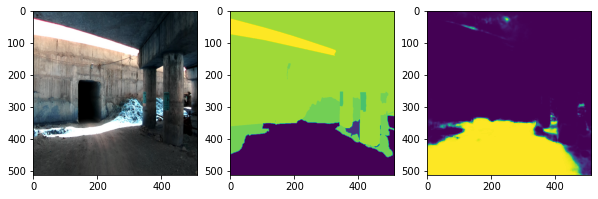

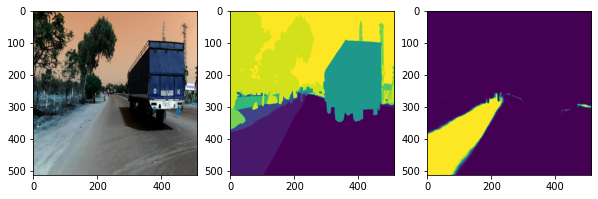

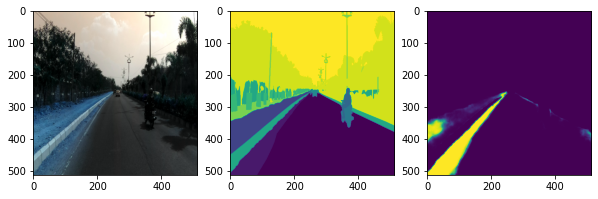

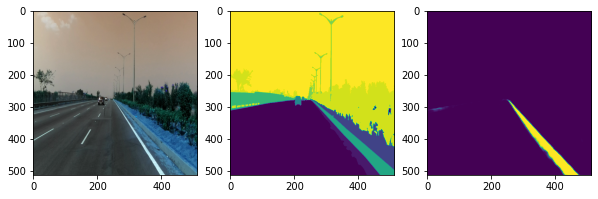

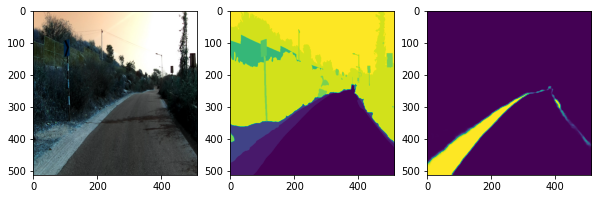

In [ ]:
for p, i in enumerate(X_test['images'].values[0:15]):
    #original image
    image = cv2.imread(i, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (512,512)) 
    
    #predicted segmentation map
    predicted  = model.predict(image[np.newaxis,:,:,:])
    
    #original segmentation map
    image_mask = cv2.imread(X_test['mask'].values[p], 0)
    image_mask = cv2.resize(image_mask, (512,512))
    

    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(image_mask)
    plt.subplot(133)
    z=np.zeros(shape=(512,512),dtype='float32')
    for i in range(len(new_label_clr.values())):
      z+=(predicted[0][:,:,1]*list(new_label_clr.values())[i])
    plt.imshow(z)
    plt.show()

**Conclusion**

1- The val-IOU-Score is around 0.54.

2- Here we using encoder-decoder model.

3- We have not implemented UNET from the scratch but have used transfer learning.

4- The results are satisfactory and good.